In [1]:
# Importing files
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

import warnings  
warnings.filterwarnings("ignore")

In [2]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 5, activation = 'softmax'))  ## OUTPUT LAYER WITH 1 NUERONS 

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical') # category  because we have 3 type

test_set = test_datagen.flow_from_directory(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode ='categorical' )

Found 245 images belonging to 5 classes.
Found 84 images belonging to 5 classes.


In [6]:
training_set.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'suprise': 4}

In [7]:
# Fit the model
classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         epochs=350,
                         validation_data=test_set,
                         validation_steps=len(test_set))

Epoch 1/350
8/8 [==============================] - 38s 5s/step - loss: 1.6254 - accuracy: 0.1796 - val_loss: 1.6230 - val_accuracy: 0.1071
Epoch 2/350
8/8 [==============================] - 30s 4s/step - loss: 1.6056 - accuracy: 0.2245 - val_loss: 1.6231 - val_accuracy: 0.1548
Epoch 3/350
8/8 [==============================] - 29s 4s/step - loss: 1.5980 - accuracy: 0.2204 - val_loss: 1.6265 - val_accuracy: 0.1548
Epoch 4/350
8/8 [==============================] - 28s 4s/step - loss: 1.5968 - accuracy: 0.2082 - val_loss: 1.6193 - val_accuracy: 0.1786
Epoch 5/350
8/8 [==============================] - 28s 4s/step - loss: 1.5919 - accuracy: 0.2653 - val_loss: 1.6192 - val_accuracy: 0.1548
Epoch 6/350
8/8 [==============================] - 28s 4s/step - loss: 1.5819 - accuracy: 0.3102 - val_loss: 1.6040 - val_accuracy: 0.2500
Epoch 7/350
8/8 [==============================] - 29s 4s/step - loss: 1.5722 - accuracy: 0.3429 - val_loss: 1.6072 - val_accuracy: 0.2262
Epoch 8/350
8/8 [==========

8/8 [==============================] - 25s 3s/step - loss: 0.6671 - accuracy: 0.7265 - val_loss: 2.1406 - val_accuracy: 0.3571
Epoch 118/350
8/8 [==============================] - 30s 4s/step - loss: 0.6552 - accuracy: 0.7429 - val_loss: 2.1292 - val_accuracy: 0.3690
Epoch 119/350
8/8 [==============================] - 30s 4s/step - loss: 0.5952 - accuracy: 0.7837 - val_loss: 2.2002 - val_accuracy: 0.3810
Epoch 120/350
8/8 [==============================] - 30s 4s/step - loss: 0.5538 - accuracy: 0.8000 - val_loss: 2.2271 - val_accuracy: 0.3214
Epoch 121/350
8/8 [==============================] - 30s 4s/step - loss: 0.7548 - accuracy: 0.7184 - val_loss: 2.1169 - val_accuracy: 0.3810
Epoch 122/350
8/8 [==============================] - 30s 4s/step - loss: 0.7002 - accuracy: 0.7551 - val_loss: 2.1005 - val_accuracy: 0.3214
Epoch 123/350
8/8 [==============================] - 30s 4s/step - loss: 0.6028 - accuracy: 0.7673 - val_loss: 2.2425 - val_accuracy: 0.3690
Epoch 124/350
8/8 [========

8/8 [==============================] - 29s 4s/step - loss: 0.3031 - accuracy: 0.9020 - val_loss: 2.7359 - val_accuracy: 0.3810
Epoch 234/350
8/8 [==============================] - 29s 4s/step - loss: 0.3131 - accuracy: 0.8898 - val_loss: 2.6934 - val_accuracy: 0.4048
Epoch 235/350
8/8 [==============================] - 29s 4s/step - loss: 0.3778 - accuracy: 0.8571 - val_loss: 2.7243 - val_accuracy: 0.3810
Epoch 236/350
8/8 [==============================] - 29s 4s/step - loss: 0.3134 - accuracy: 0.9102 - val_loss: 2.6612 - val_accuracy: 0.3929
Epoch 237/350
8/8 [==============================] - 29s 4s/step - loss: 0.3338 - accuracy: 0.9020 - val_loss: 2.7069 - val_accuracy: 0.4167
Epoch 238/350
8/8 [==============================] - 29s 3s/step - loss: 0.3095 - accuracy: 0.9102 - val_loss: 2.9983 - val_accuracy: 0.4048
Epoch 239/350
8/8 [==============================] - 30s 4s/step - loss: 0.3575 - accuracy: 0.8816 - val_loss: 2.6739 - val_accuracy: 0.3810
Epoch 240/350
8/8 [========

8/8 [==============================] - 29s 4s/step - loss: 0.2202 - accuracy: 0.8980 - val_loss: 3.1926 - val_accuracy: 0.4167
Epoch 350/350
8/8 [==============================] - 29s 4s/step - loss: 0.2178 - accuracy: 0.9265 - val_loss: 3.2358 - val_accuracy: 0.4048


In [8]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
classifier.save('expression_classifier.h5')

In [10]:
model = load_model("expression_classifier.h5")

In [11]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0  # Normalizing the image data
    probabilities = model.predict(raw_img)[0]
    plt.imshow(cv2.imread(path))
    print('Probabilities:', probabilities)

    emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise']

    max_prob_index = np.argmax(probabilities)
    max_prob = probabilities[max_prob_index]

    if max_prob > 0.5:
        print(f"It's {emotions[max_prob_index]}")
    else:
        print("Emotion not confidently detected")


def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("it's a Angry Face")
    elif Probability > 0.5:
        print("it's a Fear Face")
    elif Probability > 0.5:
        print("it's a Happy Face")
    elif Probability > 0.5:
        print("it's a sad Face")
    else:
        print("it's a suprise Face")

In [12]:
import os 
os.chdir(r'C:\Users\sunny1\Desktop\Cp2\Emoji\expression')

##  Angry Face 

1/1 [==============================] - 0s 359ms/step
Probabilities: [9.8872864e-01 2.5415736e-07 1.1236254e-02 3.4923221e-05 1.8515176e-10]
It's Angry


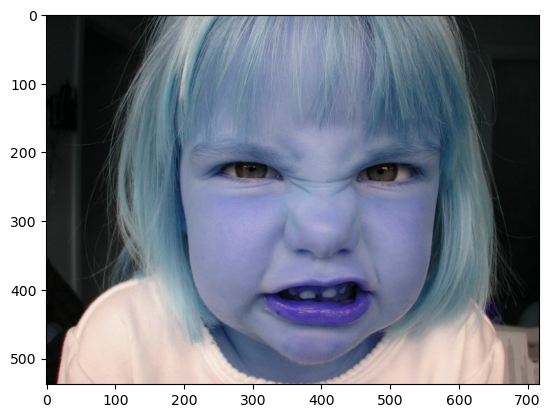

In [13]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set\Angry\42.jpg")

## Fear Face

1/1 [==============================] - 0s 63ms/step
Probabilities: [8.5953398e-06 9.9991512e-01 3.6253397e-05 4.0033978e-05 4.0165481e-13]
It's Fear


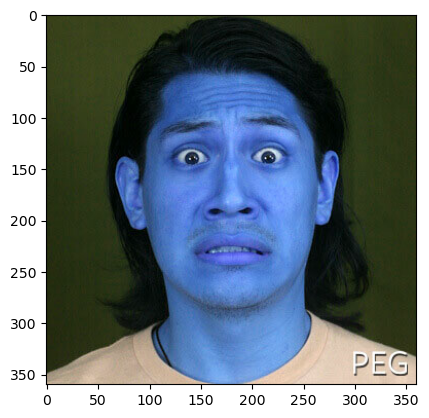

In [14]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set\Fear\9.jpg")

## Happy Face

1/1 [==============================] - 0s 80ms/step
Probabilities: [5.1741237e-03 2.7294361e-03 9.8708600e-01 5.0104461e-03 2.0024966e-09]
It's Happy


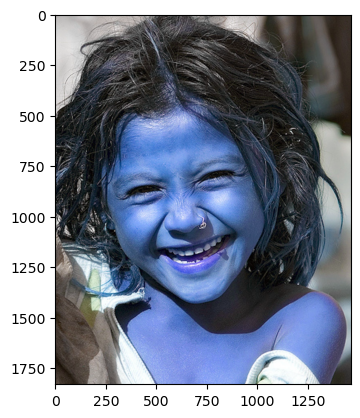

In [15]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set\Happy\1.jpg")

## sad Face

1/1 [==============================] - 0s 78ms/step
Probabilities: [2.3473282e-01 8.1565842e-02 2.9909864e-04 6.7618185e-01 7.2203726e-03]
It's Sad


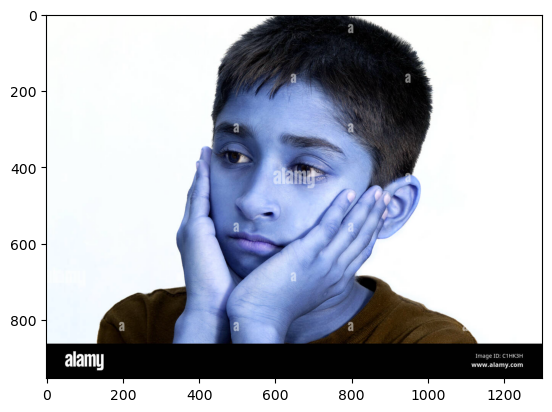

In [16]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set\Sad\13.jpg")

## suprise Face

1/1 [==============================] - 0s 62ms/step
Probabilities: [1.9690317e-08 6.4086164e-03 1.2294084e-09 7.0148992e-08 9.9359131e-01]
It's Surprise


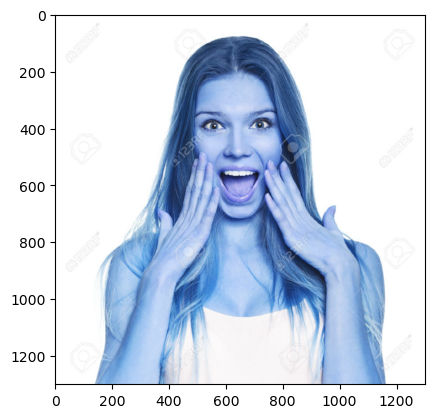

In [17]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Emoji\expression\Traning_set\suprise\35.jpg")

## model

In [18]:
import pickle
pickle.dump(model, open('expression_classifier.pkl','wb'))   # Exporting model from python to laptop